# Assignment 2

## 1 Feedforward: Building a ReLU neural network

1. In *ANLY-590 hw2.pdf* under the same directory of this jupyter notebook

1. In *ANLY-590 hw2.pdf* under the same directory of this jupyter notebook

1. Write out the forward-pass function in python

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys

In [29]:
def ff_nn_ReLu(x):
    return np.where(x>0, x, 0)

4. Class probabilities

In [30]:
def feed_forward(x, weights, bias):
    out = np.add(np.dot(x, weights), bias)
    return ff_nn_ReLu(out)

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def out_forward(hidden, weights, bias):
    out = np.add(np.dot(hidden, weights), bias)
    return sigmoid(out)

In [56]:
inp = np.array([[1, -1], [0, -1], [0, 1]])
W = np.array([[1, -1, 0], [0, 0, 0.5]])
V = np.array([[1], [0], [-1]])
b = np.array([0, 0, 1])
c = np.array([1])

In [57]:
hidden = feed_forward(inp, W, b)
output = out_forward(hidden, V, c)

In [9]:
output

array([[0.81757448],
       [0.62245933],
       [0.37754067]])

## 2 Gradient Descent

1. In *ANLY-590 hw2.pdf* under the same directory of this jupyter notebook

2. Create a visualization of the contours of this function

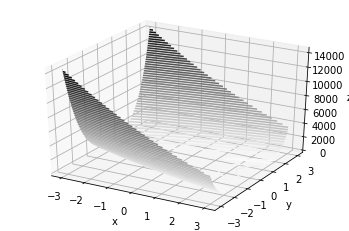

In [61]:
def f(x, y):
    return 1 - x**3 + 100 * (y**2 - x)**2

x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
# ax.view_init(0,-180)

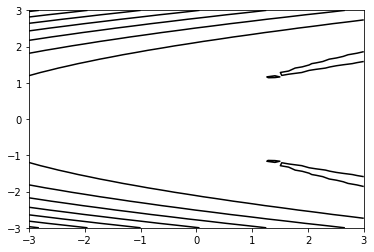

In [94]:
plt.contour(X, Y, Z, colors='black');

3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [184]:
def grad_f(betas):
    x, y = betas
    g1 = -3 * x**2 - 200 * (y**2 - x)
    g2 = 400 * y * (y**2 - x)
    return np.array([g1, g2])

def gradient_descent(starting_point, max_iters, lr):
    betas = starting_point
    trajectory = [betas]
    values = [f(betas[0], betas[1])]
    precision = 0.0001
    step_size = 1
    
    iters = 0
    
    while iters < max_iters and step_size > precision:
        grad = grad_f(betas)
        betas = betas - lr * grad
        trajectory.append(betas)
        current_val = f(betas[0], betas[1])
        step_size = abs(values[-1] - current_val)
        values.append(current_val)
        iters += 1
        
    return np.array(trajectory), values

When lr=1e-3:

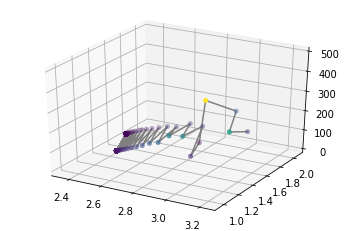

In [185]:
starting_point = np.array([3.0, 2.0])
max_iters = 1000
lr = 1e-3

betas_0, values_0 = gradient_descent(starting_point, max_iters, lr)

x_0 = betas_0[:, 0]
y_0 = betas_0[:, 1]
z_0 = f(x_0, y_0)

ax_0 = plt.axes(projection='3d')
zline_0 = z_0
xline_0 = x_0
yline_0 = y_0
ax_0.plot3D(xline_0, yline_0, zline_0, 'gray')
ax_0.scatter(x_0, y_0, z_0, c=z_0, cmap='viridis', linewidth=0.5);
# ax_0.view_init(0,0)

In [174]:
sys.stderr.write(f"o The minimum of the function is {min(values_0)}")

o The minimum of the function is 14.347301662343384

When lr=1e-4:

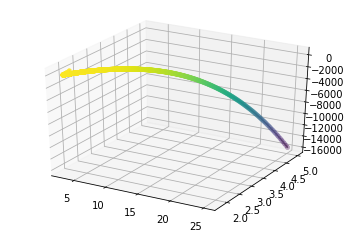

In [186]:
starting_point = np.array([3.0, 2.0])
max_iters = 1000
lr = 1e-4

betas_1, values_1 = gradient_descent(starting_point, max_iters, lr)

x_1 = betas_1[:, 0]
y_1 = betas_1[:, 1]
z_1 = f(x_1, y_1)

ax_1 = plt.axes(projection='3d')
zline_1 = z_1
xline_1 = x_1
yline_1 = y_1
ax_1.plot3D(xline_1, yline_1, zline_1, 'gray')
ax_1.scatter(x_1, y_1, z_1, c=z_1, cmap='viridis', linewidth=0.5);
# ax_1.view_init(0,0)

In [176]:
sys.stderr.write(f"o The minimum of the function is {min(values_1)}")

o The minimum of the function is -15775.931732692472

When lr=1e-6:

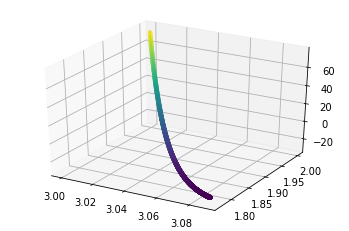

In [187]:
starting_point = np.array([3.0, 2.0])
max_iters = 1000
lr = 1e-6

betas_2, values_2 = gradient_descent(starting_point, max_iters, lr)

x_2 = betas_2[:, 0]
y_2 = betas_2[:, 1]
z_2 = f(x_2, y_2)

ax_2 = plt.axes(projection='3d')
zline_2 = z_2
xline_2 = x_2
yline_2 = y_2
ax_2.plot3D(xline_2, yline_2, zline_2, 'gray')
ax_2.scatter(x_2, y_2, z_2, c=z_2, cmap='viridis', linewidth=0.5);
# ax_2.view_init(0,0)

In [188]:
sys.stderr.write(f"o The minimum of the function is {min(values_2)}")

o The minimum of the function is -28.265419592353872

4. Write a Gradient Descent with Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm's hyperparameters.

In [165]:
def gradient_descent_momentum(starting_point, max_iters, lr, epsilon):
    betas = starting_point
    trajectory = [betas]
    values = [f(betas[0], betas[1])]
    precision = 0.0001
    step_size = 1
    v = np.zeros(2)
    
#     sum_m = np.zeros(2)
    
    iters = 0
    
    while iters < max_iters and step_size > precision:
        grad = grad_f(betas)
        v = epsilon * v + (1 - epsilon) * grad     # velocity update
        betas = betas - lr * v

        trajectory.append(betas)
        current_val = f(betas[0], betas[1])
        step_size = abs(values[-1] - current_val)     # step_size update
        values.append(current_val)
        iters += 1
        
    return np.array(trajectory), values

When lr=1e-4 and epsilon=0.9:

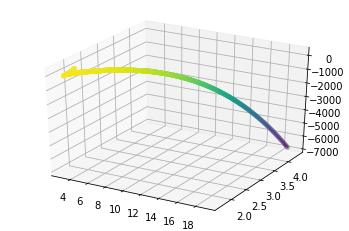

In [193]:
starting_point = np.array([3.0, 2.0])
max_iters = 1000
lr = 1e-4
epsilon = 0.9

betas_3, values_3 = gradient_descent_momentum(starting_point, max_iters, lr, epsilon)

x_3 = betas_3[:, 0]
y_3 = betas_3[:, 1]
z_3 = f(x_3, y_3)

ax_3 = plt.axes(projection='3d')
zline_3 = z_3
xline_3 = x_3
yline_3 = y_3
ax_3.plot3D(xline_3, yline_3, zline_3, 'gray')
ax_3.scatter(x_3, y_3, z_3, c=z_3, cmap='viridis', linewidth=0.5);
# ax_3.view_init(0,0)

In [194]:
sys.stderr.write(f"o The minimum of the function is {min(values_3)}")

o The minimum of the function is -6763.583239894197

When lr=1e-4 and epsilon=0.8:

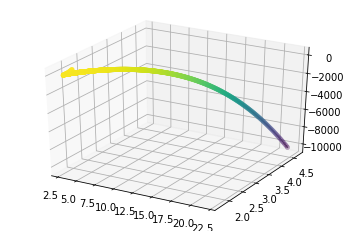

In [198]:
starting_point = np.array([3.0, 2.0])
max_iters = 1000
lr = 1e-4
epsilon = 0.8

betas_4, values_4 = gradient_descent_momentum(starting_point, max_iters, lr, epsilon)

x_4 = betas_4[:, 0]
y_4 = betas_4[:, 1]
z_4 = f(x_4, y_4)

ax_4 = plt.axes(projection='3d')
zline_4 = z_4
xline_4 = x_4
yline_4 = y_4
ax_4.plot3D(xline_4, yline_4, zline_4, 'gray')
ax_4.scatter(x_4, y_4, z_4, c=z_4, cmap='viridis', linewidth=0.5);
# ax_4.view_init(0,0)

In [199]:
sys.stderr.write(f"o The minimum of the function is {min(values_4)}")

o The minimum of the function is -10221.486214569846

When lr=1e-6 and epsilon=0.9:

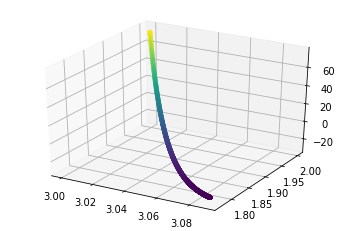

In [200]:
starting_point = np.array([3.0, 2.0])
max_iters = 1000
lr = 1e-6
epsilon = 0.9

betas_5, values_5 = gradient_descent_momentum(starting_point, max_iters, lr, epsilon)

x_5 = betas_5[:, 0]
y_5 = betas_5[:, 1]
z_5 = f(x_5, y_5)

ax_5 = plt.axes(projection='3d')
zline_5 = z_5
xline_5 = x_5
yline_5 = y_5
ax_5.plot3D(xline_5, yline_5, zline_5, 'gray')
ax_5.scatter(x_5, y_5, z_5, c=z_5, cmap='viridis', linewidth=0.5);
# ax_5.view_init(0,0)

In [201]:
sys.stderr.write(f"o The minimum of the function is {min(values_5)}")

o The minimum of the function is -28.286093844322885

When lr=1e-6 and epsilon=0.8:

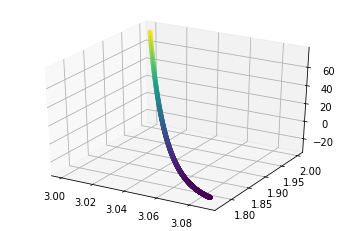

In [206]:
starting_point = np.array([3.0, 2.0])
max_iters = 1000
lr = 1e-6
epsilon = 0.8

betas_6, values_6 = gradient_descent_momentum(starting_point, max_iters, lr, epsilon)

x_6 = betas_6[:, 0]
y_6 = betas_6[:, 1]
z_6 = f(x_6, y_6)

ax_6 = plt.axes(projection='3d')
zline_6 = z_6
xline_6 = x_6
yline_6 = y_6
ax_6.plot3D(xline_6, yline_6, zline_6, 'gray')
ax_6.scatter(x_6, y_6, z_6, c=z_6, cmap='viridis', linewidth=0.5);
# ax_6.view_init(0,0)

In [207]:
sys.stderr.write(f"o The minimum of the function is {min(values_6)}")

o The minimum of the function is -28.274643218115727

## 3 Backprop

1. In *ANLY-590 hw2.pdf* under the same directory of this jupyter notebook

2. Write a function **grad_f(...)** that takes in a weights vector and returns the gradient of the Loss at that location

In [59]:
def bce(y, y_hat):
    return y/y_hat + (1-y)/(1-y_hat)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_d(x):
    return sigmoid(x) * (1-sigmoid(x))

def relu(x):
    return np.where(x>0, x, 0)

def relu_d(x):
    return np.where(x>0, 1, 0)

In [ ]:
def grad_f(x, y, weights1, weights2, bias1, bias2):
    layer1 = np.add(np.dot(x, weights1), bias1)
    out1 = relu(layer1)
    layer2 = np.add(np.dot(out1, weights2), bias2)
    output = sigmoid(layer2)

    loss = bce(y, output)
    seq_len = len(loss)

    d_weights2 = np.tile(loss * sigmoid_d(layer2), 3) * out1
    d_weights2 = np.sum(d_weights2, axis=0).reshape(3,1) / seq_len
    d_layer2 = np.tile(sigmoid_d(layer2), 3)
    weights2 = np.repeat(weights2.T, 2000, axis=0)
    x = np.repeat(np.expand_dims(x, axis=2), 3, axis=2)
    d_weights1 = np.repeat(np.expand_dims(loss * d_layer2 * weights2 * relu_d(layer1), axis=1), 2, axis=1) * x
    d_weights1 = np.sum(d_weights1, axis=0) / seq_len
    d_c = loss * sigmoid_d(layer2)
    d_c = np.sum(d_c, axis=0) / seq_len
    d_b = loss * d_layer2 * weights2 * relu_d(layer1)
    d_b = np.sum(d_b, axis=0) / seq_len

    return d_weights1, d_weights2, d_b, d_c

3. Generate a synthetic dataset like the XOR pattern

In [45]:
X = list(zip(np.random.uniform(-2, 2, 2000), np.random.uniform(-2, 2, 2000)))
y =[1 if x[0]*x[1]>=0 else 0 for x in X]

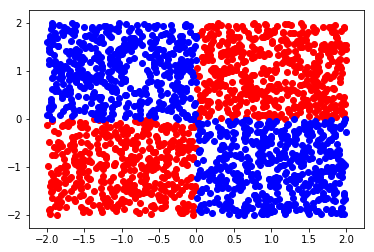

In [16]:
X1 = [x for x in X if x[0]*x[1]>=0]
X2 = [x for x in X if x[0]*x[1]<0]

X1_x, X1_y = zip(*X1)
X2_x, X2_y = zip(*X2)

plt.scatter(X1_x, X1_y,color='red')
plt.scatter(X2_x, X2_y,color='blue')
plt.show()

4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [82]:
class mlp_model:
    def __init__(self, x, y, b, c, lr, hidden):
        self.input = x
        self.y = y
        self.bias1 = b
        self.bias2 = c
        self.lr = lr

        self.weights1 = np.random.randn(self.input.shape[1], hidden)  # [inp_neuron x h]
        self.weights2 = np.random.randn(hidden, 1)  # [hidden x output]
        self.layer1 = np.zeros((self.input.shape[0], hidden))  # [inp_len x hidden]
        self.out1 = np.zeros((self.input.shape[0], hidden))  # [inp_len x hidden]
        self.layer2 = np.zeros((self.y.shape[0], 1))  # [inp_len x output]
        self.output = np.zeros((self.y.shape[0], 1))  # [inp_len x output]

        self.loss = 0

    def feedforward(self):
        self.layer1 = np.add(np.dot(self.input, self.weights1), self.bias1)
        self.out1 = relu(self.layer1)
        self.layer2 = np.add(np.dot(self.out1, self.weights2), self.bias2)
        self.output = sigmoid(self.layer2)

    def backprop(self):
        self.loss = bce(self.y, self.output)
        seq_len = len(self.loss)

        d_weights2 = np.tile(self.loss * sigmoid_d(self.layer2), 3) * self.out1
        d_weights2 = np.sum(d_weights2, axis=0).reshape(3, 1) / seq_len
        d_layer2 = np.tile(sigmoid_d(self.layer2), 3)
        weights2 = np.repeat(self.weights2.T, 2000, axis=0)
        input = np.repeat(np.expand_dims(self.input, axis=2), 3, axis=2)
        d_weights1 = np.repeat(np.expand_dims(self.loss * d_layer2 * weights2 * relu_d(self.layer1), axis=1), 2,
                               axis=1) * input
        d_weights1 = np.sum(d_weights1, axis=0) / seq_len
        d_c = self.loss * sigmoid_d(self.layer2)
        d_c = np.sum(d_c, axis=0) / seq_len
        d_b = self.loss * d_layer2 * weights2 * relu_d(self.layer1)
        d_b = np.sum(d_b, axis=0) / seq_len

        # update the weights
        self.weights1 -= self.lr * d_weights1
        self.weights2 -= self.lr * d_weights2
        self.bias1 = np.subtract(self.bias1, self.lr * d_b)
        self.bias2 = np.subtract(self.bias2, self.lr * d_c)

        return self.loss


    def predict(self, source):
        self.input =source
        self.feedforward()
        return np.array([1 if y_pred>= 0.5 else 0 for y_pred in self.output])


np.random.seed(11)

X = list(zip(np.random.uniform(-2, 2, 2000), np.random.uniform(-2, 2, 2000)))
y = [1 if x[0] * x[1] >= 0 else 0 for x in X]

X = np.array(X)
y = np.array([y]).T
b = np.array([0, 0, 1])
c = np.array([1])
lr = 1e-2
hidden = 3

model = mlp_model(X, y, b, c, lr, hidden)

iters = 500
prev_loss = 99999
for i in range(iters):
    model.feedforward()
    loss = model.backprop()
    total_loss = np.sum(loss)
    avg_loss = total_loss / y.shape[0]
    if prev_loss < total_loss:
        break
    prev_loss = total_loss
    sys.stderr.write(f"At iteration {i}, total loss={total_loss}, average loss = {avg_loss}\n")

At iteration 0, total loss=22452.049458119116, average loss = 11.226024729059558
At iteration 1, total loss=21889.386783572358, average loss = 10.94469339178618
At iteration 2, total loss=21346.2355792593, average loss = 10.67311778962965
At iteration 3, total loss=20821.789866270003, average loss = 10.410894933135001
At iteration 4, total loss=20315.405680268253, average loss = 10.157702840134126
At iteration 5, total loss=19826.45393067591, average loss = 9.913226965337955
At iteration 6, total loss=19353.942247020175, average loss = 9.676971123510087
At iteration 7, total loss=18897.090479926363, average loss = 9.448545239963181
At iteration 8, total loss=18455.325438864216, average loss = 9.227662719432107
At iteration 9, total loss=18028.378226786317, average loss = 9.014189113393158
At iteration 10, total loss=17615.359324030236, average loss = 8.807679662015119
At iteration 11, total loss=17215.93997788171, average loss = 8.607969988940855
At iteration 12, total loss=16829.62906

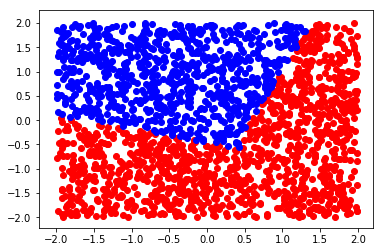

In [83]:
y_pred = model.predict(X)

X1 = [X[i] for i in range(len(X)) if y_pred[i] == 1]
X2 = [X[i] for i in range(len(X)) if y_pred[i] == 0]

X1_x, X1_y = zip(*X1)
X2_x, X2_y = zip(*X2)

plt.scatter(X1_x, X1_y,color='red')
plt.scatter(X2_x, X2_y,color='blue')
plt.show()

5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently

In [94]:
class mlp_model:
    def __init__(self, x, y, b, c, lr, epsilon, hidden):
        self.input = x
        self.y = y
        self.bias1 = b
        self.bias2 = c
        self.lr = lr
        self.epsilon = epsilon

        self.v_weights1 = np.zeros((self.input.shape[1], hidden))  # [inp_neuron x h]
        self.v_weights2 = np.zeros((hidden, 1))  # [hidden x output]
        self.v_b = np.zeros(self.bias1.shape)
        self.v_c = np.zeros(self.bias2.shape)

        self.weights1 = np.random.randn(self.input.shape[1], hidden)  # [inp_neuron x h]
        self.weights2 = np.random.randn(hidden, 1)  # [hidden x output]
        self.layer1 = np.zeros((self.input.shape[0], hidden))  # [inp_len x hidden]
        self.out1 = np.zeros((self.input.shape[0], hidden))  # [inp_len x hidden]
        self.layer2 = np.zeros((self.y.shape[0], 1))  # [inp_len x output]
        self.output = np.zeros((self.y.shape[0], 1))  # [inp_len x output]

        self.loss = 0

    def feedforward(self):
        self.layer1 = np.add(np.dot(self.input, self.weights1), self.bias1)
        self.out1 = relu(self.layer1)
        self.layer2 = np.add(np.dot(self.out1, self.weights2), self.bias2)
        self.output = sigmoid(self.layer2)

    def backprop(self):
        self.loss = bce(self.y, self.output)
        seq_len = len(self.loss)

        d_weights2 = np.tile(self.loss * sigmoid_d(self.layer2), 3) * self.out1
        d_weights2 = np.sum(d_weights2, axis=0).reshape(3, 1) / seq_len
        d_layer2 = np.tile(sigmoid_d(self.layer2), 3)
        weights2 = np.repeat(self.weights2.T, 2000, axis=0)
        input = np.repeat(np.expand_dims(self.input, axis=2), 3, axis=2)
        d_weights1 = np.repeat(np.expand_dims(self.loss * d_layer2 * weights2 * relu_d(self.layer1), axis=1), 2,
                               axis=1) * input
        d_weights1 = np.sum(d_weights1, axis=0) / seq_len
        d_c = self.loss * sigmoid_d(self.layer2)
        d_c = np.sum(d_c, axis=0) / seq_len
        d_b = self.loss * d_layer2 * weights2 * relu_d(self.layer1)
        d_b = np.sum(d_b, axis=0) / seq_len

        # update the weights
        self.v_weights1 = self.epsilon * self.v_weights1 + (1 - self.epsilon) * d_weights1     # velocity update
        self.v_weights2 = self.epsilon * self.v_weights2 + (1 - self.epsilon) * d_weights2     # velocity update
        self.v_b = self.epsilon * self.v_b + (1 - self.epsilon) * d_b
        self.v_c = self.epsilon * self.v_c + (1 - self.epsilon) * d_c
        self.weights1 -= self.lr * self.v_weights1
        self.weights2 -= self.lr * self.v_weights2
        self.bias1 = np.subtract(self.bias1, self.lr * self.v_b)
        self.bias2 = np.subtract(self.bias2, self.lr * self.v_c)

        return self.loss


    def predict(self, source):
        self.input =source
        self.feedforward()
        return np.array([1 if y_pred>= 0.5 else 0 for y_pred in self.output])


np.random.seed(11)

X = list(zip(np.random.uniform(-2, 2, 2000), np.random.uniform(-2, 2, 2000)))
y = [1 if x[0] * x[1] >= 0 else 0 for x in X]

X = np.array(X)
y = np.array([y]).T
b = np.array([0, 0, 1])
c = np.array([1])
lr = 1e-2
hidden = 3
epsilon = 0.9

model = mlp_model(X, y, b, c, lr, epsilon, hidden)

iters = 500
prev_loss = 99999
for i in range(iters):
    model.feedforward()
    loss = model.backprop()
    total_loss = np.sum(loss)
    avg_loss = total_loss / y.shape[0]
    if prev_loss < total_loss:
        break
    prev_loss = total_loss
    sys.stderr.write(f"At iteration {i}, total loss={total_loss}, average loss = {avg_loss}\n")

At iteration 0, total loss=22452.049458119116, average loss = 11.226024729059558
At iteration 1, total loss=22394.96447452331, average loss = 11.197482237261655
At iteration 2, total loss=22287.036177169786, average loss = 11.143518088584893
At iteration 3, total loss=22134.276575697404, average loss = 11.067138287848701
At iteration 4, total loss=21942.41256537653, average loss = 10.971206282688264
At iteration 5, total loss=21716.796474350464, average loss = 10.858398237175232
At iteration 6, total loss=21462.401403718737, average loss = 10.731200701859368
At iteration 7, total loss=21183.80362124293, average loss = 10.591901810621465
At iteration 8, total loss=20885.147900856267, average loss = 10.442573950428134
At iteration 9, total loss=20570.216653592124, average loss = 10.285108326796061
At iteration 10, total loss=20242.425388925054, average loss = 10.121212694462526
At iteration 11, total loss=19904.733341340558, average loss = 9.952366670670278
At iteration 12, total loss=19

I didn't find out that the loss decreases faster than the model without momentum, but the loss reaches to a lower value than the previous model. One reason is that the model throws the whole dataset into the training session. The model may not response to the change of the weights timely. Using a subset for updating the weights (batch) may solve the problem. The second possible reason is that the dataset is not big enough for the momentum method showing its efficiency.

6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot

In [97]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), cmap=plt.cm.Spectral)

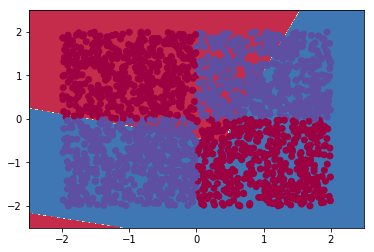

In [98]:
plot_decision_boundary(lambda x: model.predict(x))